In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pprint import pprint

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from auxiliar_func import *
from plot_func import *

In [86]:
target = 'income_50k'
df_tr = pd.read_csv('../train.csv')

prep_par, model_par = get_best_params('./results/results_rf.csv')
prep_par['generate_dummies'] = False
rf = RandomForestClassifier(**model_par)
df_tr_pre = preprocessing(df_tr, **prep_par)

df_tr_pre = pd.get_dummies(df_tr_pre, prefix_sep='$')

#  summarize column names
df_tr_pre.columns = [x.split('(')[0] for x in df_tr_pre.columns]
df_tr_pre.columns = [x.replace('admin and managerial', '') for x in df_tr_pre.columns]

In [87]:
rf.fit(df_tr_pre.drop(target, axis=1), df_tr_pre[target])

RandomForestClassifier(max_depth=30, n_estimators=125, random_state=42)

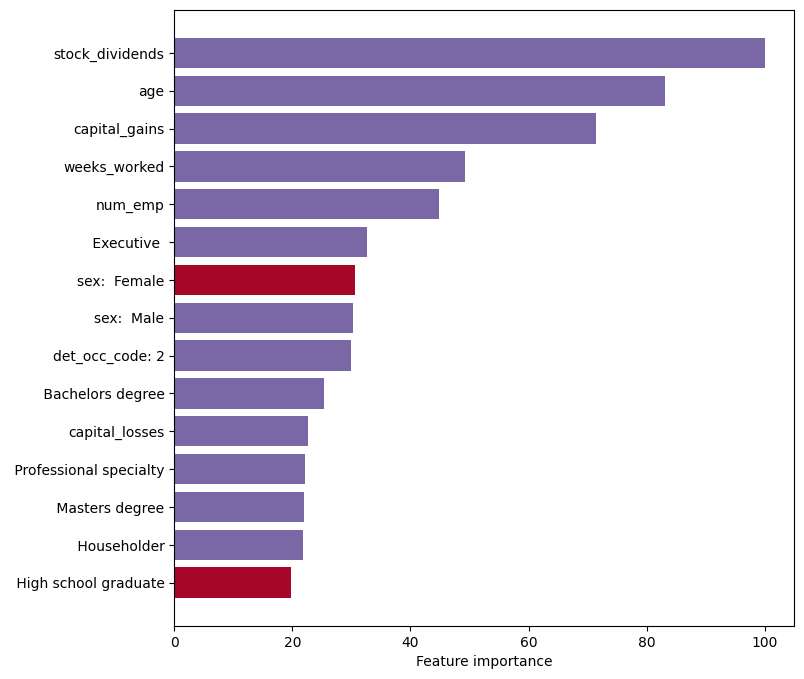

In [88]:
def plot_feature_importance_gini(model, X, y, n_features=20, save=''):
    feature_importance = model.feature_importances_
    feature_importance = 100.0 * (feature_importance / feature_importance.max())
    feature_names = [x.split('$')[-1] if len(x) > 20 else x.replace('$', ': ') for x in X.columns]
    sorted_idx = np.argsort(feature_importance)

    # get the correlation with the target
    corr = X.corrwith(y)
    corr = corr[sorted_idx[-n_features:]]
    corr = corr / corr.max()

    plt.figure(figsize=(8, 8))
    for i in range(n_features):
        color = '#7A68A6' if corr[i] > 0 else '#A60628'
        plt.barh(i, feature_importance[sorted_idx[-n_features:]][i], align='center', color=color)
    
    plt.yticks(np.arange(n_features), [feature_names[i] for i in sorted_idx[-n_features:]])
    plt.xlabel('Feature importance')
    if save:
        plt.savefig(save, bbox_inches='tight')
    plt.show()

def plot_feature_importance_perm(model, X, y, n_features=20, save=''):
    from sklearn.inspection import permutation_importance
    feature_importance = permutation_importance(model, X, y, n_repeats=10, random_state=42, n_jobs=-1)
    feature_importance.importances_mean = 100.0 * (feature_importance.importances_mean / feature_importance.importances_mean.max())
    feature_names = [x.split('$')[-1] if len(x) > 20 else x.replace('$', ': ') for x in X.columns]
    sorted_idx = np.argsort(feature_importance.importances_mean)

    corr = X.corrwith(y)
    corr = corr[sorted_idx[-n_features:]]
    corr = corr / corr.max()

    plt.figure(figsize=(8, 8))
    for i in range(n_features):
        color = '#7A68A6' if corr[i] > 0 else '#A60628'
        plt.barh(i, feature_importance.importances_mean[sorted_idx[-n_features:]][i], align='center', color=color)
    
    plt.yticks(np.arange(n_features), [feature_names[i] for i in sorted_idx[-n_features:]])
    plt.xlabel('Feature importance')
    if save:
        plt.savefig(save, bbox_inches='tight')
    plt.show()

plot_feature_importance_gini(rf, df_tr_pre.drop(target, axis=1), df_tr_pre[target], 15)
plot_feature_importance_perm(rf, df_tr_pre.drop(target, axis=1), df_tr_pre[target], 15)

## Negative Correlated Features

In [6]:
df = pd.read_csv('../Census-Income-KDD.csv')
df['income_50k'] = df['income_50k'].map({' - 50000.': 0, ' 50000+.': 1})

In [3]:
print(df['education'].value_counts())

education
 High school graduate                      48407
 Children                                  47422
 Some college but no degree                27820
 Bachelors degree(BA AB BS)                19865
 7th and 8th grade                          8007
 10th grade                                 7557
 11th grade                                 6876
 Masters degree(MA MS MEng MEd MSW MBA)     6541
 9th grade                                  6230
 Associates degree-occup /vocational        5358
 Associates degree-academic program         4363
 5th or 6th grade                           3277
 12th grade no diploma                      2126
 1st 2nd 3rd or 4th grade                   1799
 Prof school degree (MD DDS DVM LLB JD)     1793
 Doctorate degree(PhD EdD)                  1263
 Less than 1st grade                         819
Name: count, dtype: int64


In [7]:
df['sex'].value_counts()

sex
 Female    103984
 Male       95539
Name: count, dtype: int64

In [21]:
# histogram for each sex de percentage of people with income > 50k
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Suppose you have a DataFrame called 'df' with the columns 'sex' and 'income_50k'

# Calculate the percentage of each sex earning more than 50k
percentage_df = df.groupby('sex')['income_50k'].mean() * 100

# Create a new DataFrame with the percentages
percentage_data = pd.DataFrame({'Percentage': percentage_df})

# Define the seaborn color palette
palette = sns.color_palette('Blues_d')

# Plot the percentage of each sex earning more than 50k with a palette
ax = percentage_data.plot(kind='bar', rot=0, legend=False, color=palette)

# Labels and title of the graph
ax.set_xlabel('Sex')
ax.set_ylabel('Percentage')

# Show the graph
plt.show()